# Data Deduplication using Clustering
**Objective**: Learn and implement data deduplication techniques.

**Task**: Hierarchical Clustering for Deduplication

**Steps**:
1. Data Set: Obtain a dataset containing duplicate employee information.
2. Perform Clustering: Use hierarchical agglomerative clustering to cluster the employee
records.
3. Evaluate Duplicates: Determine duplicates by analyzing the clusters formed.
4. Clean Data: Remove duplicate employee records found during clustering.

Original DataFrame with Clusters:
    EmployeeID  Age  Salary  YearsOfExperience  Cluster
0            1   28   50000                  2        4
1            2   34   60000                  5        7
2            3   28   50000                  2        4
3            4   34   60000                  5        7
4            5   45   75000                  8        3
5            6   50   80000                 10        1
6            7   45   75000                  8        3
7            8   50   80000                 10        1
8            9   28   50000                  2        4
9           10   34   60000                  5        7
10          11   60  100000                 15        5
11          12   55   95000                 13        6
12          13   60  100000                 15        5
13          14   65  105000                 17        8
14          15   60  100000                 15        5
15          16   55   95000                 13        6
16          17

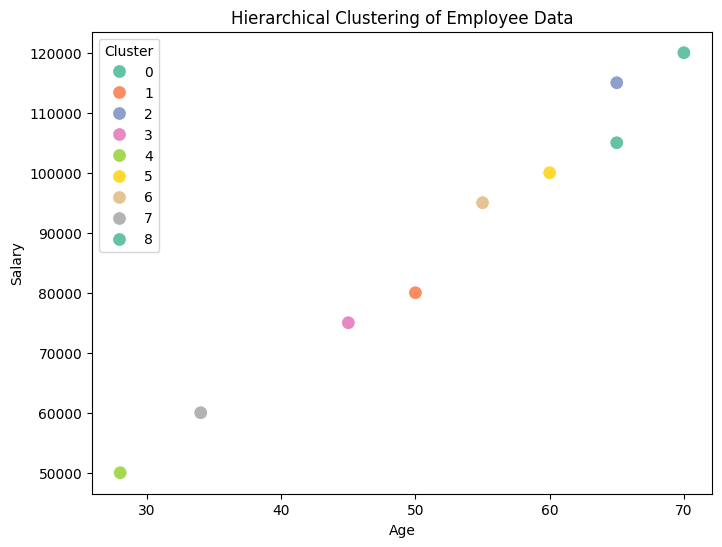

In [1]:
# write your code from here
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Generate a synthetic employee dataset with potential duplicates
np.random.seed(42)
employee_data = {
    'EmployeeID': np.arange(1, 21),
    'Age': [28, 34, 28, 34, 45, 50, 45, 50, 28, 34, 60, 55, 60, 65, 60, 55, 70, 65, 70, 65],
    'Salary': [50000, 60000, 50000, 60000, 75000, 80000, 75000, 80000, 50000, 60000, 100000, 95000, 100000, 105000, 100000, 95000, 120000, 115000, 120000, 115000],
    'YearsOfExperience': [2, 5, 2, 5, 8, 10, 8, 10, 2, 5, 15, 13, 15, 17, 15, 13, 20, 18, 20, 18]
}

# Creating a DataFrame
df = pd.DataFrame(employee_data)

# Step 2: Preprocess the data by standardizing it
features = ['Age', 'Salary', 'YearsOfExperience']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Step 3: Perform Hierarchical Clustering (Agglomerative Clustering)
agg_clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0.5)  # distance_threshold for forming clusters
df['Cluster'] = agg_clustering.fit_predict(df_scaled)

# Step 4: Evaluate duplicates by analyzing the clusters formed
# If employees are in the same cluster, they are considered duplicates
deduplicated_df = df.groupby('Cluster').first().reset_index(drop=True)

# Step 5: Clean Data - Remove duplicate employee records
print("Original DataFrame with Clusters:")
print(df[['EmployeeID', 'Age', 'Salary', 'YearsOfExperience', 'Cluster']])

print("\nDeduplicated DataFrame:")
print(deduplicated_df[['EmployeeID', 'Age', 'Salary', 'YearsOfExperience']])

# Optional: Visualize the clustering results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Age'], y=df['Salary'], hue=df['Cluster'], palette='Set2', s=100, marker='o')
plt.title('Hierarchical Clustering of Employee Data')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend(title='Cluster')
plt.show()